## Tarea Dia 4

In [348]:
# Importar librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [349]:
# Importar la base de datos BLI
OCDE=pd.read_csv("BLI.csv")

In [350]:
# Ver los encabezados

OCDE.head()


,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,4.3,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,2.7,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,4.8,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.9,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,1.8,NaN,NaN


# Analisis Inicial
- ¿Cuántos países hay en la base de datos? ¿Cuáles son?

In [351]:
# Contamos los diferentes paises que hay en la base de datos

len(OCDE["Country"].unique())

39

In [352]:
# Arreglo de paises diferentes

OCDE["Country"].unique()

array(['Australia', 'Austria', 'Belgium', 'Canada', 'Czech Republic',
       'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Iceland', 'Ireland', 'Italy', 'Japan', 'Korea', 'Luxembourg',
       'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland',
       'Portugal', 'Slovak Republic', 'Spain', 'Sweden', 'Switzerland',
       'Turkey', 'United Kingdom', 'United States', 'Brazil', 'Chile',
       'Estonia', 'Israel', 'Latvia', 'Russia', 'Slovenia',
       'South Africa', 'OECD - Total'], dtype=object)

-¿Cuántos tipos de unidades se manejan?

In [353]:
# Contamos los diferentes unidades que hay en la base de datos

len(OCDE["Unit"].unique())

7

In [354]:
# Arreglo de las diferentes unidades

OCDE["Unit"].unique()

array(['Percentage', 'Average score', 'Ratio', 'US Dollar', 'Years',
       'Micrograms per cubic metre', 'Hours'], dtype=object)

- ¿Cuáles son los indicadores medidos? ¿Cuántos son?

In [355]:
# Contamos los diferentes indicadores que hay en la base de datos

len(OCDE["Indicator"].unique())

24

In [356]:
# Arreglo de los diferentes indicadores

OCDE["Indicator"].unique()

array(['Labour market insecurity',
       'Stakeholder engagement for developing regulations',
       'Feeling safe walking alone at night',
       'Dwellings without basic facilities', 'Housing expenditure',
       'Rooms per person', 'Household net adjusted disposable income',
       'Household net financial wealth', 'Employment rate',
       'Long-term unemployment rate', 'Personal earnings',
       'Quality of support network', 'Educational attainment',
       'Student skills', 'Years in education', 'Air pollution',
       'Water quality', 'Voter turnout', 'Life expectancy',
       'Self-reported health', 'Life satisfaction', 'Homicide rate',
       'Employees working very long hours',
       'Time devoted to leisure and personal care'], dtype=object)

- Descripción básica de los indicadores numéricos (estadística descriptiva) 

- ¿Podemos eliminar algunas columnas de nuestra base de datos sin perder información importante? Presenta la tabla y explica por qué eliminste dichas columnas

In [357]:
#Eliminamos las columnas que no nos sirven en una copia OCDE2

#Flags, no sirve ya que en muchas celdas no trae dato
#Flag Codes, datos vacios
#Reference, sin datos
#Reference period code, sin datos
#Power code, dato que contiene es unit 
#Powercode code, sin datos, todo en ceros
#Unit code, es una abreviacion del contenido de la columna Unit
#INEQUALITY, abreviacion de la columna Inequality
#MEASURE, valor L en todas las  filas
#Measure, valor Value en todas las filas
#INDICATOR, abreviatura de Indicator

OCDE2=OCDE.drop(["INDICATOR", "MEASURE", "Measure", "INEQUALITY", "PowerCode Code", "Reference Period Code", "PowerCode", "Unit Code", "Flag Codes", "Reference Period", "Flags"], axis=1)

In [358]:
#Observamos los datos modificados

pd.DataFrame(OCDE2)

,LOCATION,Country,Indicator,Inequality,Unit,Value
0,AUS,Australia,Labour market insecurity,Total,Percentage,4.30
1,AUT,Austria,Labour market insecurity,Total,Percentage,2.70
2,BEL,Belgium,Labour market insecurity,Total,Percentage,4.80
3,CAN,Canada,Labour market insecurity,Total,Percentage,3.90
4,CZE,Czech Republic,Labour market insecurity,Total,Percentage,1.80
5,DNK,Denmark,Labour market insecurity,Total,Percentage,2.30
6,FIN,Finland,Labour market insecurity,Total,Percentage,2.70
7,FRA,France,Labour market insecurity,Total,Percentage,5.00
8,DEU,Germany,Labour market insecurity,Total,Percentage,2.00
9,GRC,Greece,Labour market insecurity,Total,Percentage,17.40


-¿Puedes cambiar en nombre de las columnas a español?

In [359]:
# Renombrar las columnas de ingles a español

OCDE2.rename(columns={"LOCATION": "Ubicacion", "Country": "Pais", "Indicator": "Indicador", "Inequality":"Desigualdad", "Unit": "Unidad", "Value":"Valor"})

,Ubicacion,Pais,Indicador,Desigualdad,Unidad,Valor
0,AUS,Australia,Labour market insecurity,Total,Percentage,4.30
1,AUT,Austria,Labour market insecurity,Total,Percentage,2.70
2,BEL,Belgium,Labour market insecurity,Total,Percentage,4.80
3,CAN,Canada,Labour market insecurity,Total,Percentage,3.90
4,CZE,Czech Republic,Labour market insecurity,Total,Percentage,1.80
5,DNK,Denmark,Labour market insecurity,Total,Percentage,2.30
6,FIN,Finland,Labour market insecurity,Total,Percentage,2.70
7,FRA,France,Labour market insecurity,Total,Percentage,5.00
8,DEU,Germany,Labour market insecurity,Total,Percentage,2.00
9,GRC,Greece,Labour market insecurity,Total,Percentage,17.40


## Búsqueda de datos

-Imprime el los datos o Dataframes ( ¡Panditas! :D ) que se te solicitan (Recuerden no modificar el original) y entregenme sus observacioens de los datos (pueden usar gráficas

-Imprime los valores de los indicadores para México, eliminando la columna del país)

In [360]:
# Cambiamos los paises al indice
OCDE2=OCDE2.set_index("Country")
OCDE2.head()




,LOCATION,Indicator,Inequality,Unit,Value
Country,,,,,
Australia,AUS,Labour market insecurity,Total,Percentage,4.3
Austria,AUT,Labour market insecurity,Total,Percentage,2.7
Belgium,BEL,Labour market insecurity,Total,Percentage,4.8
Canada,CAN,Labour market insecurity,Total,Percentage,3.9
Czech Republic,CZE,Labour market insecurity,Total,Percentage,1.8


In [361]:
#Filtramos los datos solamente de Mexico 

mex=OCDE2.loc["Mexico"]
mex[["Indicator", "Unit", "Value"]]



,Indicator,Unit,Value
Country,,,
Mexico,Labour market insecurity,Percentage,4.60
Mexico,Stakeholder engagement for developing regulations,Average score,3.50
Mexico,Stakeholder engagement for developing regulations,Average score,3.50
Mexico,Stakeholder engagement for developing regulations,Average score,3.50
Mexico,Feeling safe walking alone at night,Percentage,45.90
Mexico,Feeling safe walking alone at night,Percentage,48.20
Mexico,Feeling safe walking alone at night,Percentage,43.60
Mexico,Dwellings without basic facilities,Percentage,4.20
Mexico,Dwellings without basic facilities,Percentage,4.20


-Muestra los países con esperanza de vida femenina mayor al promedio general y sus datos

In [362]:
OCDE3=OCDE2.set_index("Indicator")
OCDE3.head()

,LOCATION,Inequality,Unit,Value
Indicator,,,,
Labour market insecurity,AUS,Total,Percentage,4.3
Labour market insecurity,AUT,Total,Percentage,2.7
Labour market insecurity,BEL,Total,Percentage,4.8
Labour market insecurity,CAN,Total,Percentage,3.9
Labour market insecurity,CZE,Total,Percentage,1.8


In [363]:
E_V=OCDE3.loc["Life expectancy"]
E_V[["Unit", "Value", "Inequality"]]


,Unit,Value,Inequality
Indicator,,,
Life expectancy,Years,82.5,Total
Life expectancy,Years,81.3,Total
Life expectancy,Years,81.1,Total
Life expectancy,Years,81.5,Total
Life expectancy,Years,78.7,Total
Life expectancy,Years,80.8,Total
Life expectancy,Years,81.6,Total
Life expectancy,Years,82.4,Total
Life expectancy,Years,80.7,Total


In [364]:
# Obtener tabla  por pais del indicador esperanza de vida, en mujeres

E_VPA=E_V.set_index("Inequality")
E_VPA.head()
E_VPA.T

EVPA=E_VPA.loc["Women"]
EVPA[["Value","LOCATION"]]



,Value,LOCATION
Inequality,,
Women,84.5,AUS
Women,83.7,AUT
Women,83.4,BEL
Women,83.6,CAN
Women,81.6,CZE
Women,82.7,DNK
Women,84.4,FIN
Women,85.5,FRA
Women,83.1,DEU


In [365]:
# Al final de la lista vemos el promedio de la OECD 
PEVM=82.7
print("El promedio general de esperanza de vida es "+ str(round(PEVM,2)) + " años")

El promedio general de esperanza de vida es 82.7 años


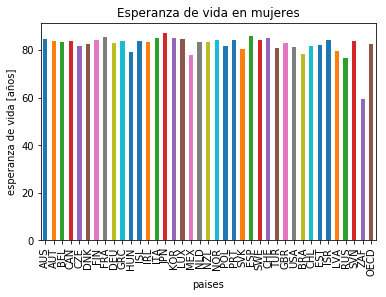

In [366]:
# Visualizar de forma grafica los paises que tienen esperanza de vida en mujeres por arriba del promedio

EVPAF=EVPA.set_index("LOCATION")

EVPAF['Value'].plot(kind='bar')
plt.xlabel('paises')
plt.ylabel('esperanza de vida [años]')
plt.title('Esperanza de vida en mujeres')
plt.show()

-Muestra los países cuya seguridad al caminar en la noche es menor al promedio y sus valores

In [367]:
OCDE3=OCDE2.set_index("Indicator")
OCDE3.head()


,LOCATION,Inequality,Unit,Value
Indicator,,,,
Labour market insecurity,AUS,Total,Percentage,4.3
Labour market insecurity,AUT,Total,Percentage,2.7
Labour market insecurity,BEL,Total,Percentage,4.8
Labour market insecurity,CAN,Total,Percentage,3.9
Labour market insecurity,CZE,Total,Percentage,1.8


In [368]:
SCN=OCDE3.loc["Feeling safe walking alone at night"]
SCN[["Unit", "Value", "Inequality"]]

,Unit,Value,Inequality
Indicator,,,
Feeling safe walking alone at night,Percentage,63.6,Total
Feeling safe walking alone at night,Percentage,80.7,Total
Feeling safe walking alone at night,Percentage,70.7,Total
Feeling safe walking alone at night,Percentage,80.9,Total
Feeling safe walking alone at night,Percentage,68.3,Total
Feeling safe walking alone at night,Percentage,83.0,Total
Feeling safe walking alone at night,Percentage,82.9,Total
Feeling safe walking alone at night,Percentage,69.6,Total
Feeling safe walking alone at night,Percentage,75.9,Total


In [369]:
# Obtener tabla  por pais del indicador de Sentirse seguro al caminar por la noche

SCN_PP=SCN.set_index("Inequality")
SCN_PP.head()


SCNPP=SCN_PP.loc["Total"]
SCNPP[["Value","LOCATION"]]


,Value,LOCATION
Inequality,,
Total,63.6,AUS
Total,80.7,AUT
Total,70.7,BEL
Total,80.9,CAN
Total,68.3,CZE
Total,83.0,DNK
Total,82.9,FIN
Total,69.6,FRA
Total,75.9,DEU


In [370]:
# Al final de la lista vemos el promedio de la OECD 
Prom=68.6
print("El promedio general de Sentirse seguro al caminar por la noche es "+ str(round(Prom,2)) + " %")

El promedio general de Sentirse seguro al caminar por la noche es 68.6 %


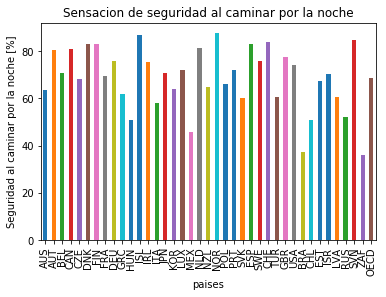

In [371]:
# Visualizar de forma grafica los paises cuya seguridad al caminar en la noche es menor al promedio y sus valores

SCNPPF=SCNPP.set_index("LOCATION")

SCNPPF['Value'].plot(kind='bar')
plt.xlabel('paises')
plt.ylabel('Seguridad al caminar por la noche [%]')
plt.title('Sensacion de seguridad al caminar por la noche')
plt.show()

- Muestra las columnas de los datos completos de los países con mejor satisfacción de vida.

In [372]:
# Obtener datos del indicador: Satisfaccion de Vida por Pais:

OCDE5=OCDE2.set_index("Indicator")
OCDE5.head()

SV=OCDE5.loc["Life satisfaction"]
SV[["Value","LOCATION"]]

SV_PA=SV.set_index("Inequality")
SV_PA.head()

SVPA=SV_PA.loc["Total"]
SVPA[["Value","LOCATION"]]


,Value,LOCATION
Inequality,,
Total,7.3,AUS
Total,7.0,AUT
Total,6.9,BEL
Total,7.3,CAN
Total,6.6,CZE
Total,7.5,DNK
Total,7.5,FIN
Total,6.4,FRA
Total,7.0,DEU


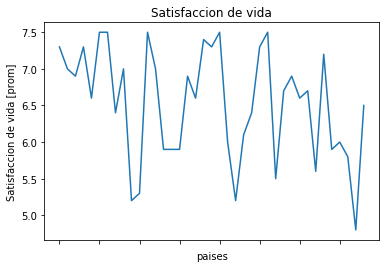

In [373]:
# Obtener grafico de Satisfaccion de Vida por Pais
SVPA['Value'].plot(kind='line')
plt.xlabel('paises')
plt.ylabel('Satisfaccion de vida [prom]')
plt.title('Satisfaccion de vida')
plt.show()


## Información gráfica

- Realiza 3 análisis de la relación entre dos variables.

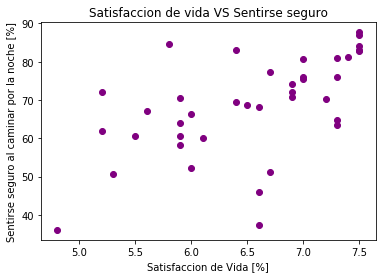

In [374]:
# Revisaremos la relacion que existe entre: Sentirse seguro al caminar por la noche y la Satisfaccion de vida

plt.scatter(SVPA["Value"],SCNPPF["Value"], facecolor="purple")
plt.xlabel('Satisfaccion de Vida [%]')
plt.ylabel('Sentirse seguro al caminar por la noche [%]')
plt.title('Satisfaccion de vida VS Sentirse seguro')
plt.show()


- Mi conclusion: Si hay relacion entre estas variables, a mayor sensacion de seguridad, mayor satisfaccion de vida

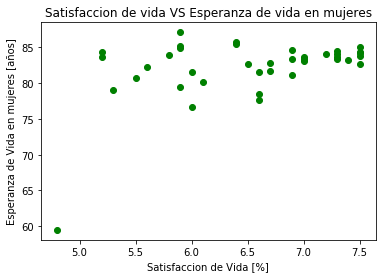

In [375]:
# Revisaremos la relacion que existe entre: Sentirse seguro al caminar por la noche y la Esperanza de vida en mujeres

plt.scatter(SVPA["Value"],EVPAF["Value"], facecolor="green")
plt.xlabel('Satisfaccion de Vida [%]')
plt.ylabel('Esperanza de Vida en mujeres [años]')
plt.title('Satisfaccion de vida VS Esperanza de vida en mujeres')
plt.show()

- Mi conclusion: No existe relacion entre estas dos variables

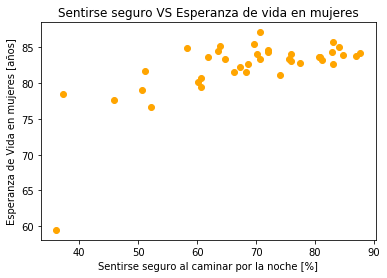

In [376]:
# Revisaremos la relacion que existe entre: Sentirse seguro al caminar de noche y la Esperanza de vida en mujeres
plt.scatter(SCNPPF["Value"],EVPAF["Value"], facecolor="orange")
plt.xlabel('Sentirse seguro al caminar por la noche [%]')
plt.ylabel('Esperanza de Vida en mujeres [años]')
plt.title('Sentirse seguro VS Esperanza de vida en mujeres')
plt.show()

-Mi conclusion: No existe relacion entre estas dos variables

-Realizar 2 análisis donde se necesite usar histogramas.

In [377]:
# Analizaremos el Indicador Satisfaccion de vida mediante un Histograma

#plt.hist(EVPAF["Value"],5, facecolor="orange")
#plt.xlabel("Esperanza de Vida [año]")
#plt.ylabel("Paises")
#plt.title("Esperanza de Vida OECD")
#plt.show()

- Presenta un análisis utilizando una gráfica de barras de los indicadores para múltiples paises. (PUNTOS EXTRA)

- Realicen una análisis de correlación para 4 variables (PUNTOS EXTRA) (¿Scatter or density?)